In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import re

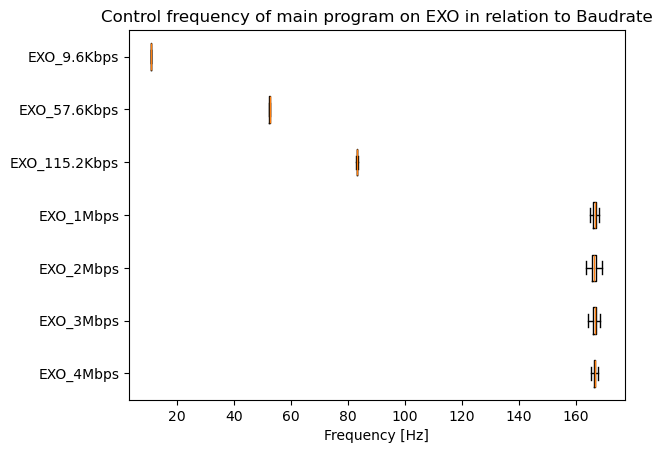

In [26]:
data = []
names = []
meanprops = {"marker": "o", "markersize": 5}
folder = r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test"

def baudrate_key(name):
    match = re.search(r'_(\d+(?:\.\d+)?)([KM]bps|bps)', name)
    if match:
        num, unit = match.groups()
        num = float(num)
        return num * {'bps': 1, 'Kbps': 1_000, 'Mbps': 1_000_000}[unit]
    return 0

filenames = sorted(
    [f for f in os.listdir(folder) if f.startswith("frequency_data") and f.endswith(".txt")],
    key=baudrate_key,
    reverse=True
)

for filename in filenames:
    with open(os.path.join(folder, filename), "r") as file:
        a = [float(line.strip()) for line in file]
    data.append(a)
    suffix = filename[len("frequency_data_"):-len(".txt")]
    names.append(suffix)

plt.boxplot(data, vert=False, tick_labels=names, manage_ticks=True, showfliers=False)
plt.title('Control frequency of main program on EXO in relation to Baudrate')
plt.xlabel("Frequency [Hz]")
plt.show()


EXO_100Hz_loop.txt: 2.03% outliers


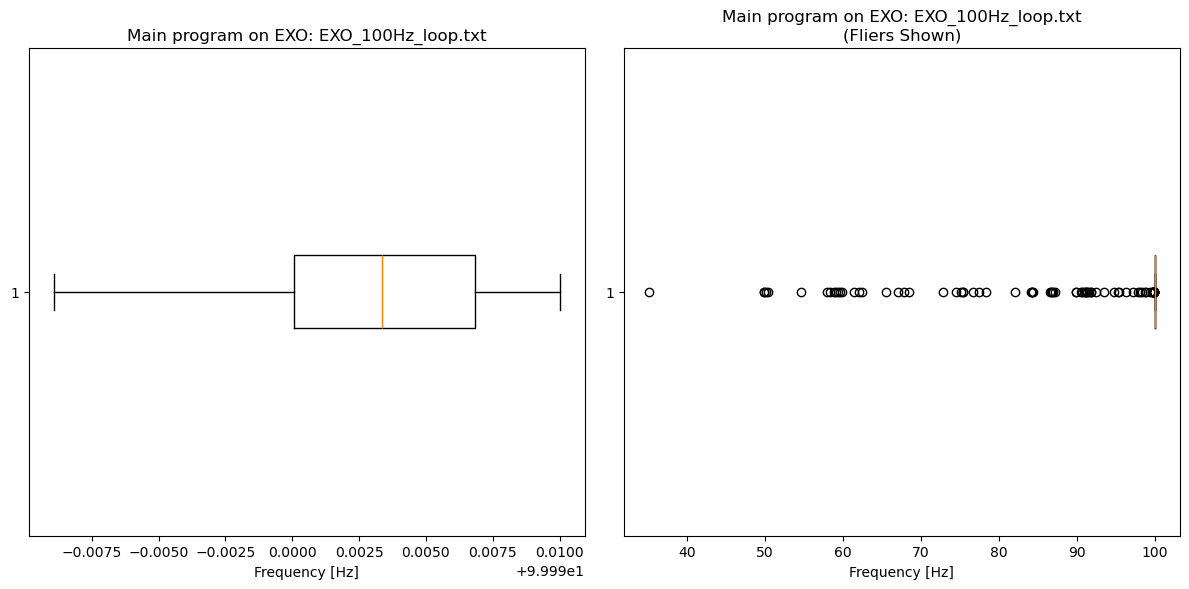

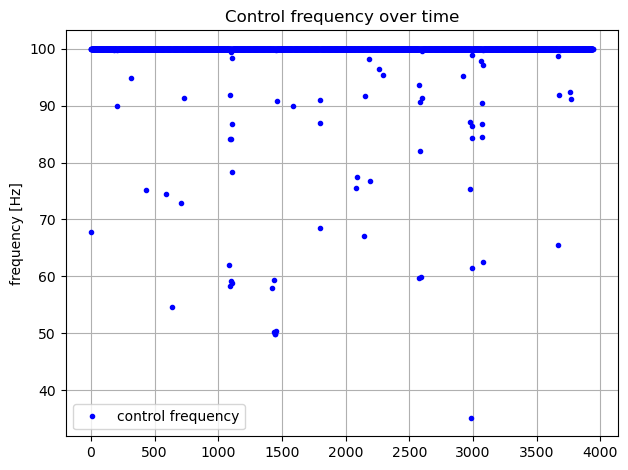

EXO_150Hz_loop.txt: 14.12% outliers


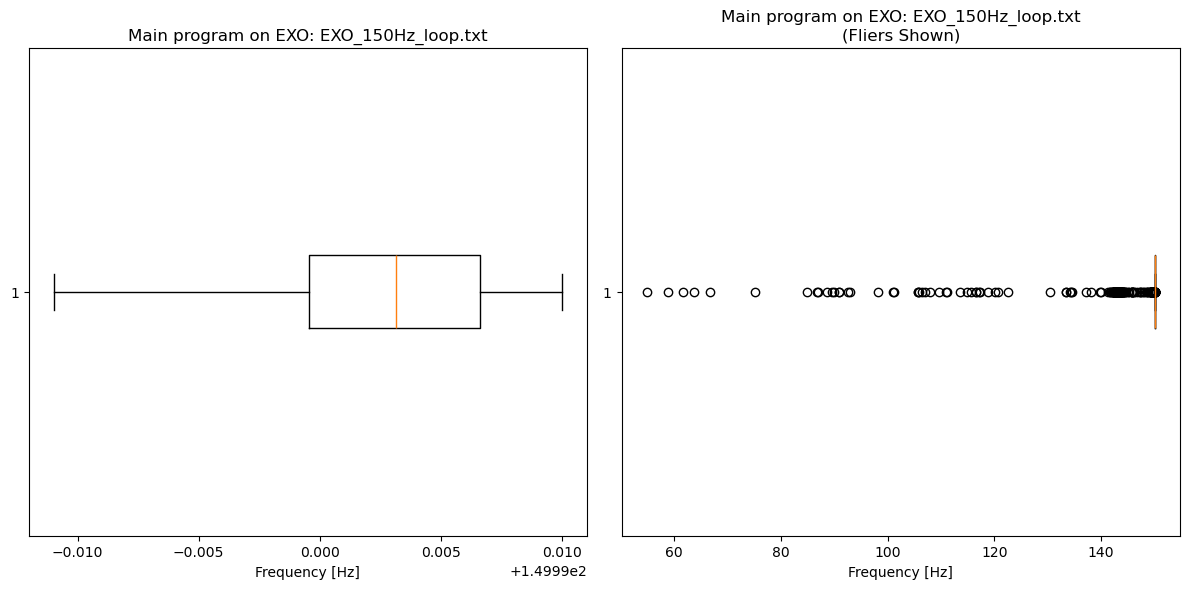

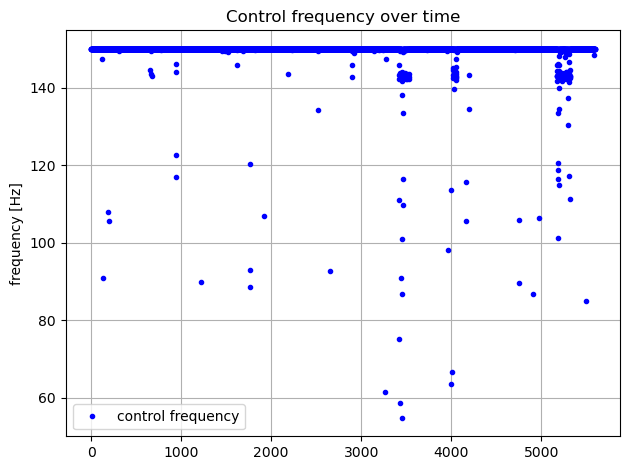

EXO_200Hz_loop.txt: 17.22% outliers


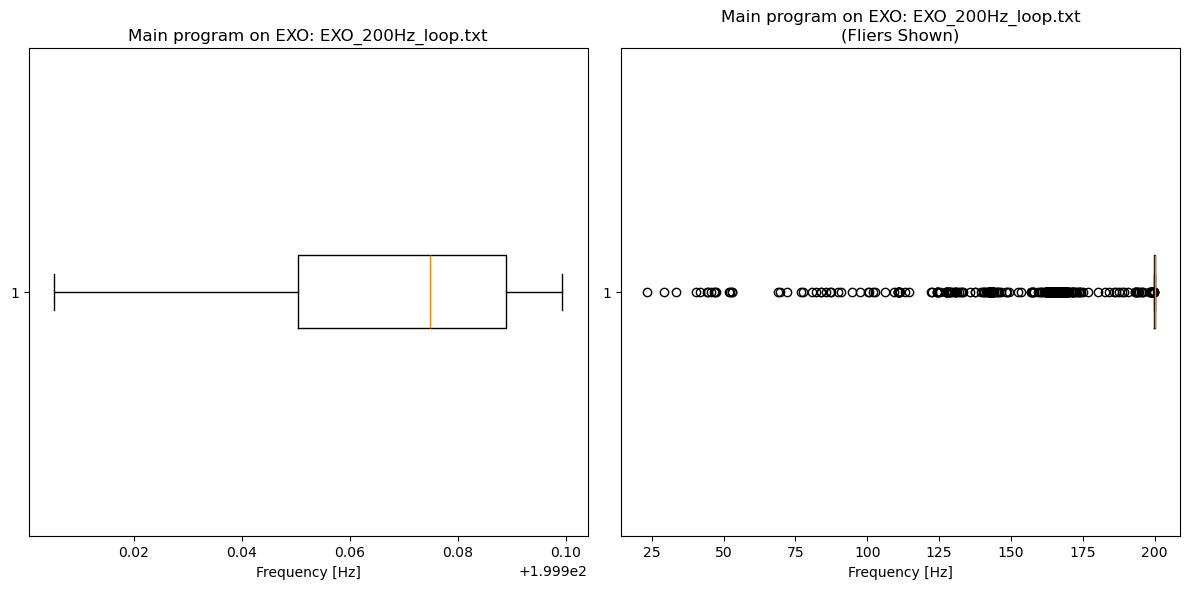

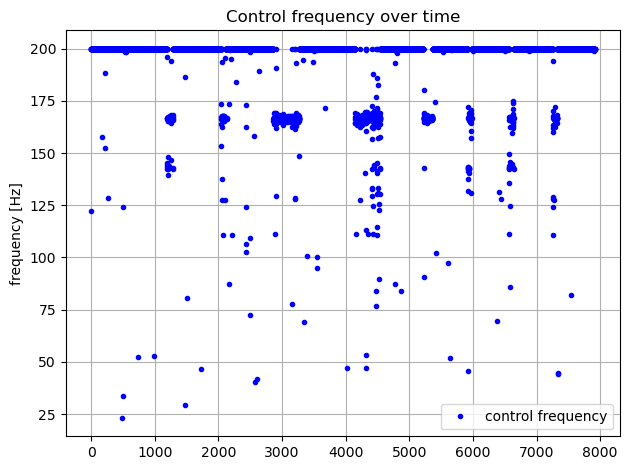

EXO_Baud4M_140Hz_loop.txt: 2.34% outliers


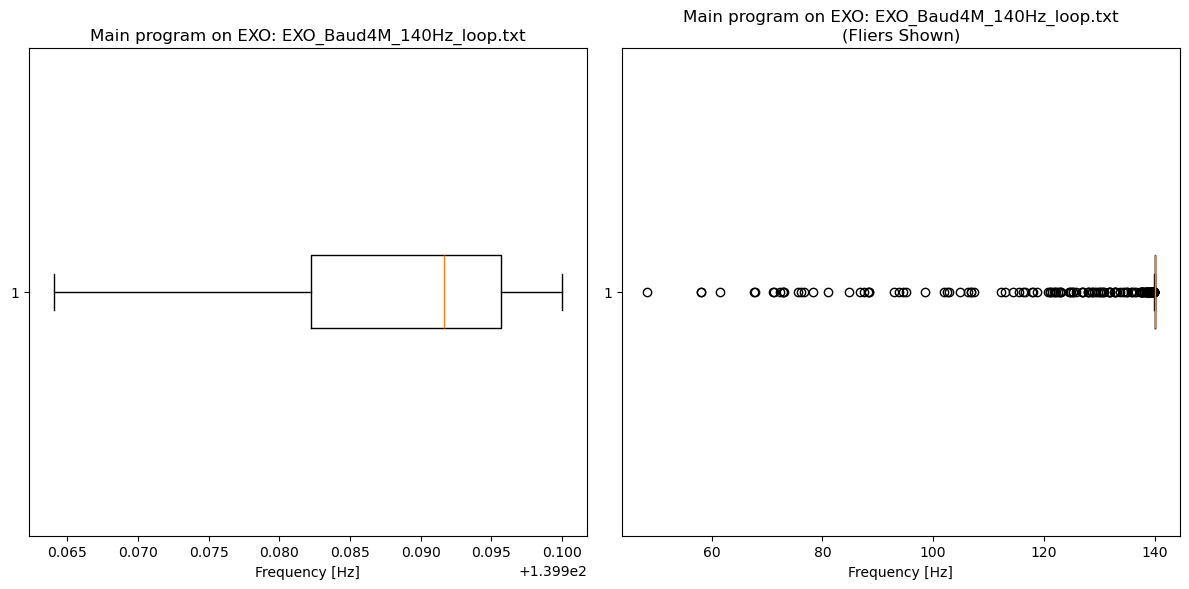

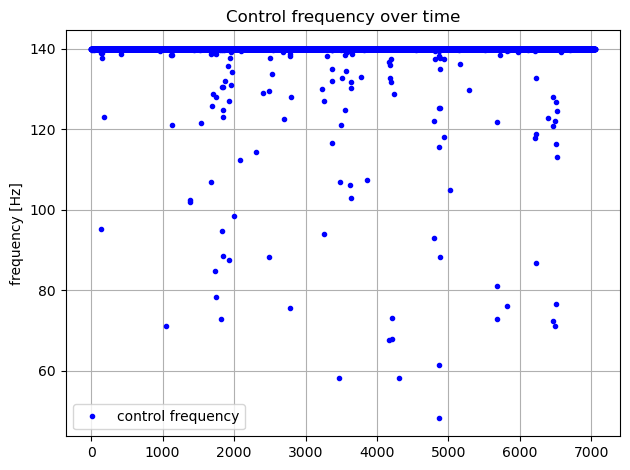

EXO_Baud4M_400Hz_loop.txt: 17.38% outliers


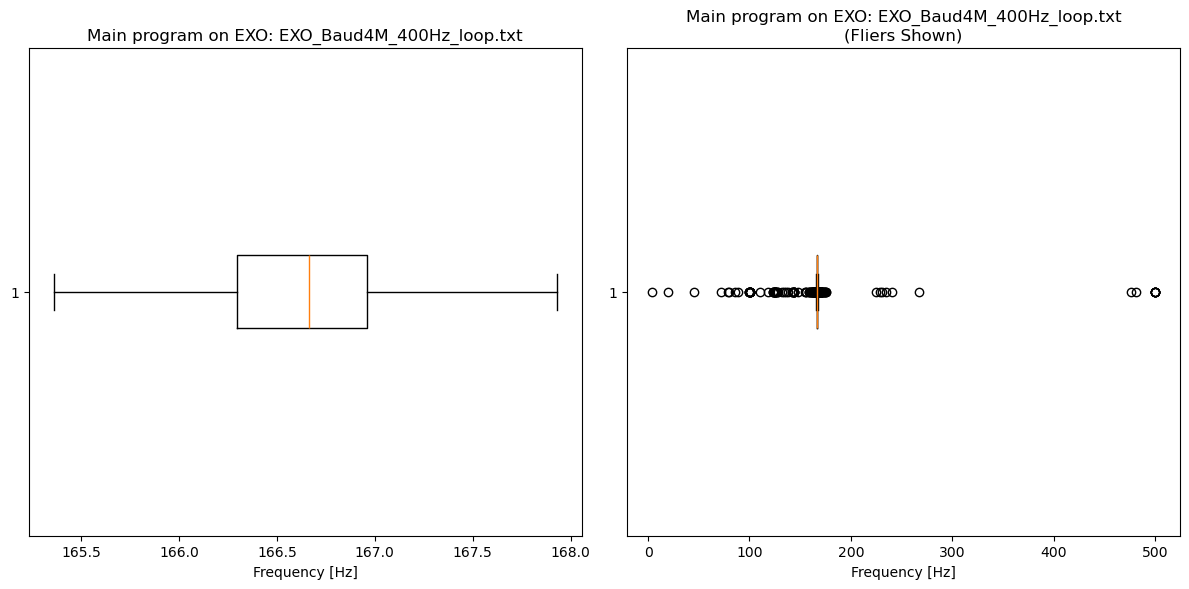

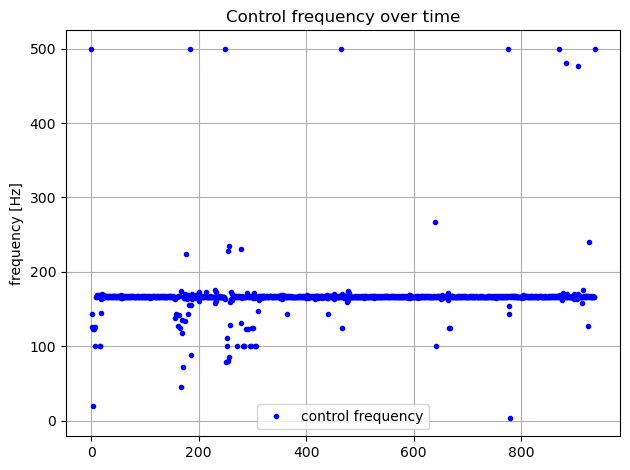

In [27]:
meanprops = {
    "marker": "o",
    "markersize": 5,
}

for filename in os.listdir(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test")):
    if filename.startswith("EXO"):
        with open(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test", filename), "r") as file:
            a = [float(line.strip()) for line in file]


        # Convert to numpy array
        data = np.array(a)

        # Calculate IQR for outlier detection
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outlier_percent = len(outliers) / len(data) * 100

        print(f"{filename}: {outlier_percent:.2f}% outliers")



        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

        # First boxplot (without fliers)
        axes[0].boxplot(a, vert=False, manage_ticks=True, showfliers=False)
        axes[0].set_title(f"Main program on EXO: {filename}")
        axes[0].set_xlabel("Frequency [Hz]")

        # Second boxplot (with fliers)
        axes[1].boxplot(a, vert=False, manage_ticks=True, showfliers=True)
        axes[1].set_title(f"Main program on EXO: {filename}\n(Fliers Shown)")
        axes[1].set_xlabel("Frequency [Hz]")

        # Display the plots
        plt.tight_layout()
        plt.show()

        # Plot Current Torque
        plt.plot(data, label='control frequency', color='blue', marker=".", linestyle="None")
        plt.ylabel('frequency [Hz]')
        plt.title(f'Control frequency over time')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


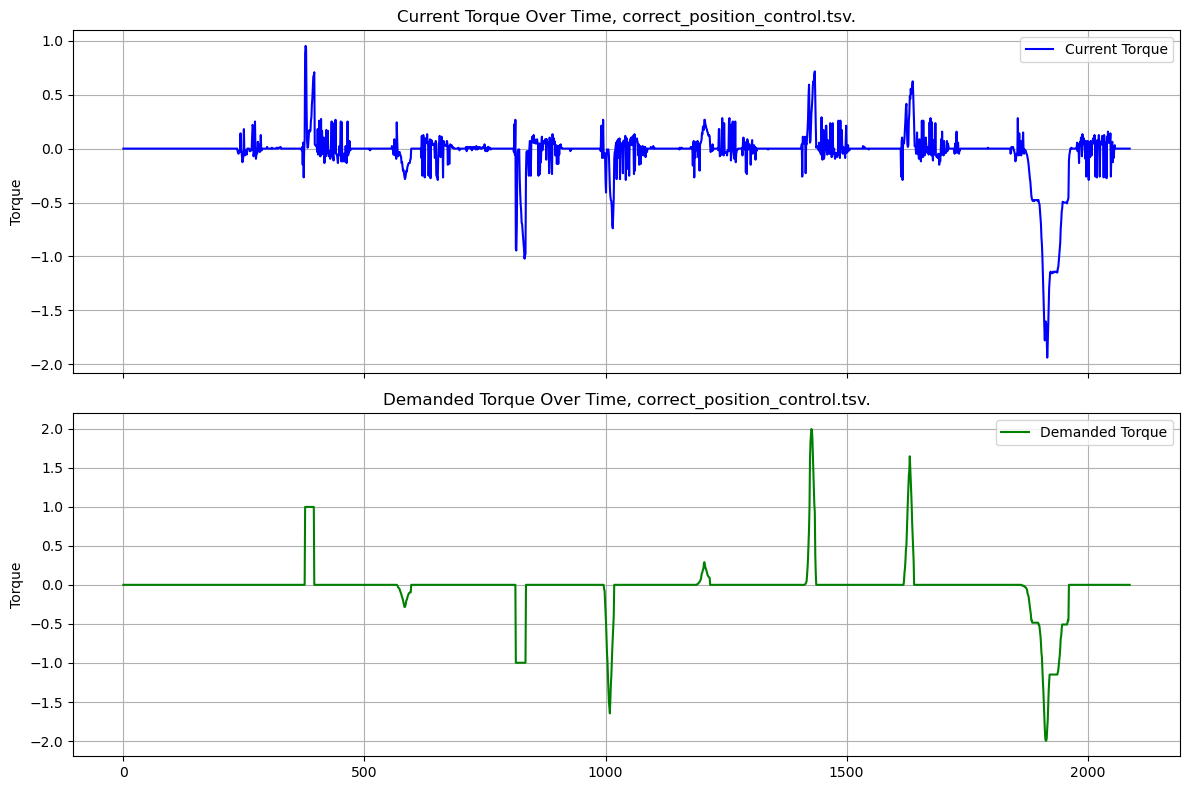

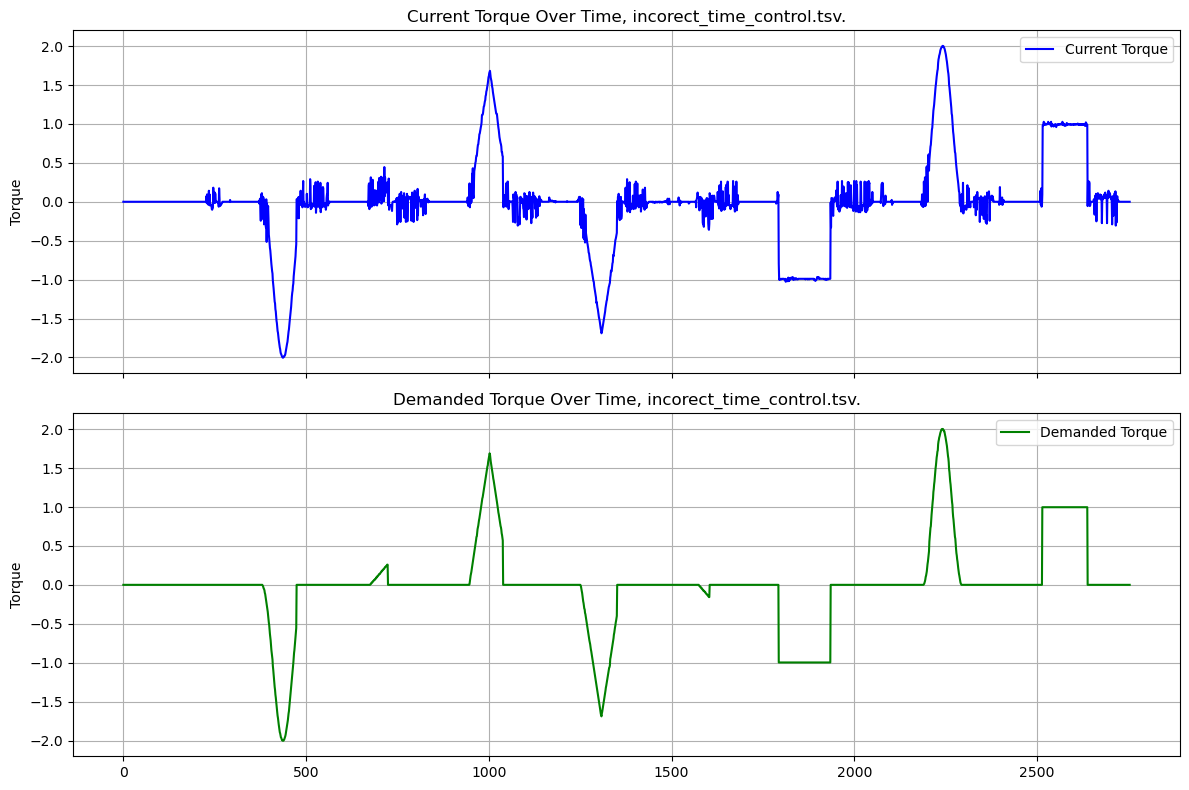

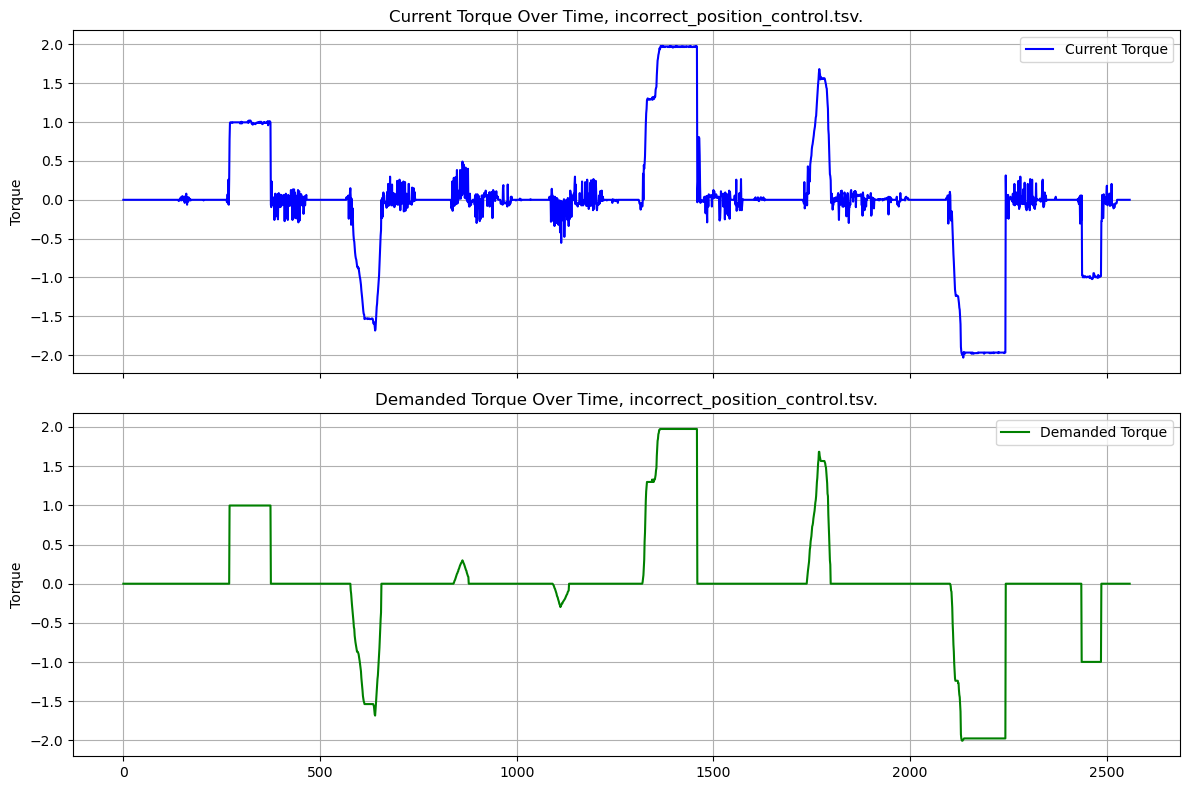

In [28]:
for filename in os.listdir(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test")):

    # Load data
    df = pd.read_csv(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test", filename), sep="\t")

    # Create a figure with two subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot Current Torque
    axs[0].plot(df['current_torque'], label='Current Torque', color='blue')
    axs[0].set_ylabel('Torque')
    axs[0].set_title(f'Current Torque Over Time, {filename}.')
    axs[0].grid(True)
    axs[0].legend()

    # Plot Demanded Torque
    axs[1].plot(df['demanded_torque'], label='Demanded Torque', color='green')
    axs[1].set_ylabel('Torque')
    axs[1].set_title(f'Demanded Torque Over Time, {filename}.')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
